In [1]:
import pynucastro as pyna

In [2]:
rl = pyna.ReacLibLibrary()
mylib = rl.linking_nuclei(["p", "he4", "c12", "c13", "n13", "n14", "n15", "o15"])
pynet = pyna.PythonNetwork(libraries=[mylib])

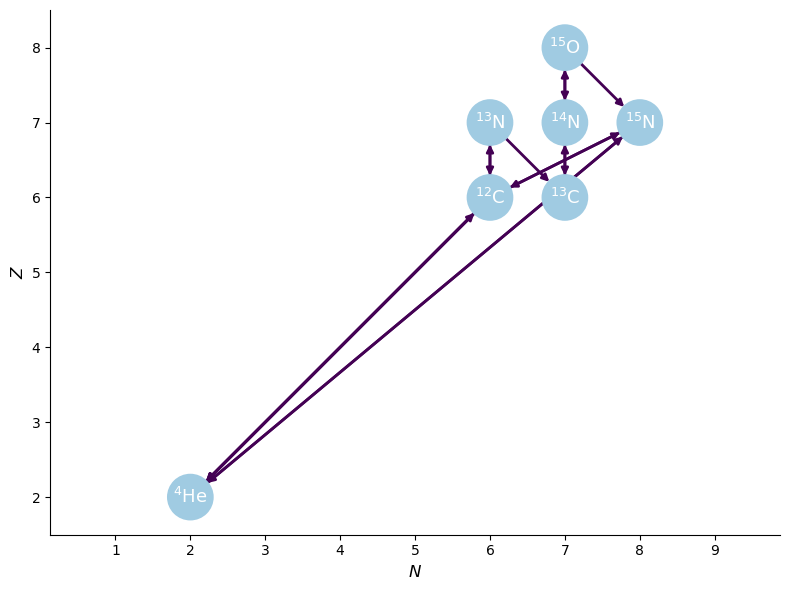

In [3]:
pynet.plot(outfile="cno_first.pdf")

In [5]:
comp = pyna.Composition(pynet.get_nuclei())
comp.set_solar_like()
density = 150
temperature = 2.e7
state = (density, temperature, comp)
unimportant_rates = pynet.find_unimportant_rates([state], 1.e-20)

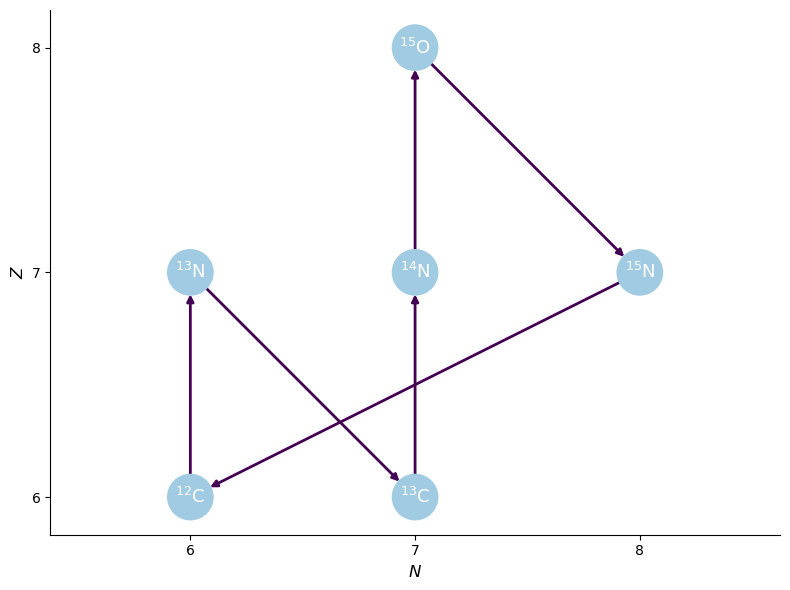

In [6]:
pynet.remove_rates(unimportant_rates.keys())
pynet.plot("cno_filtered.pdf")

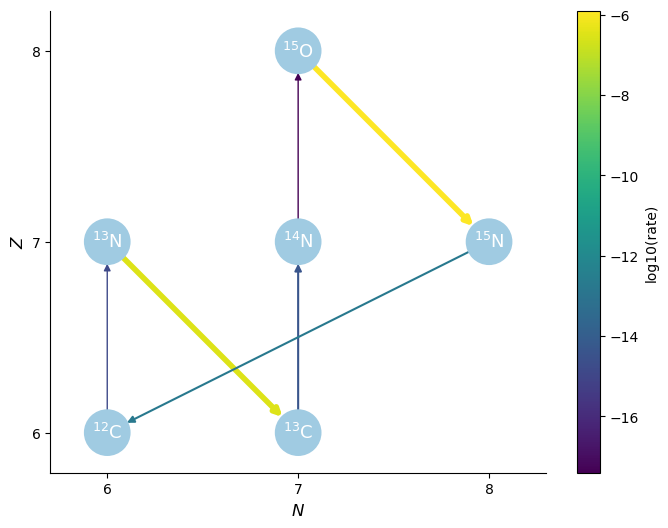

In [7]:
pynet.plot(rho=density, T=temperature, comp=comp)

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [15]:
pynet.write_network("cno.py")

In [16]:
import cno

In [22]:
rho = 150
T = 2.e7

X0 = np.zeros(cno.nnuc)
X0[cno.jp] = 0.7
X0[cno.jhe4] = 0.28
X0[cno.jc12] = 0.02

Y0 = X0/cno.A

tmax = 1.e20

sol = solve_ivp(cno.rhs, [0, tmax], Y0, method="BDF", jac=cno.jacobian,
                dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-8)

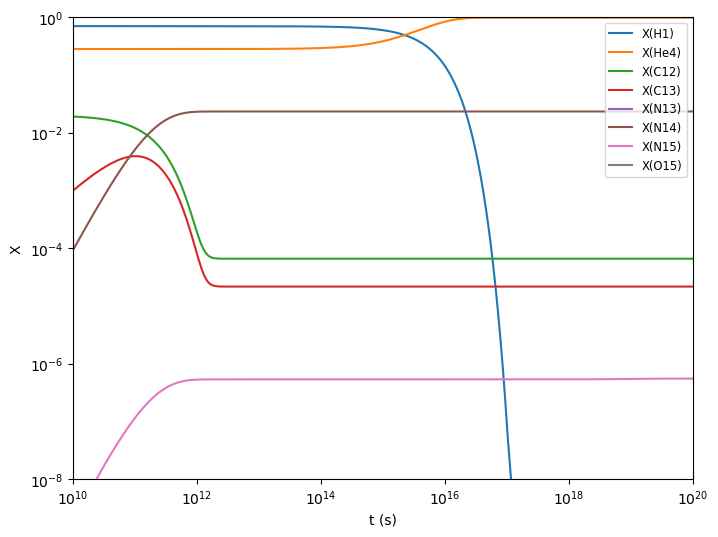

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(cno.nnuc):
    ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=f"X({cno.names[i].capitalize()})")

ax.set_xlim(1.e10, 1.e20)
ax.set_ylim(1.e-8, 1.0)
ax.legend(fontsize="small")
ax.set_xlabel("t (s)")
ax.set_ylabel("X")

fig.set_size_inches((8, 6))